In [315]:
from pysimrel.pysimrel import *
from pysimrel.utilities import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize

In [331]:
def plot_cov_mat(obj):
    norm = lambda x: (x - x.min())/(x.max - x.min)
    cmap = plt.get_cmap("plasma")
    r,c = obj.properties.sigma.shape
    gap_idx = obj.n_resp

    cov_11 = obj.covariances.cov_ww
    cov_12 = obj.covariances.cov_zw
    cov_21 = obj.covariances.cov_zw.T
    cov_22 = obj.covariances.cov_zz
    
    fig = plt.figure(tight_layout=True, figsize=(8,8))
    gs = GridSpec(nrows=r, ncols=c, figure=fig, hspace=0, wspace=0)
    ax1 = fig.add_subplot(gs[:gap_idx, :gap_idx])
    ax2 = fig.add_subplot(gs[:gap_idx, gap_idx:])
    ax3 = fig.add_subplot(gs[gap_idx:, :gap_idx])
    ax4 = fig.add_subplot(gs[gap_idx:, gap_idx:])
    

    cmap11 = cmap(norm(cov_11))
    cmap11[:,:,3] = cov_11
    ax1.imshow(cmap11)
    ax1.set_xticks([])
    ax1.set_yticks(range(obj.n_resp))
    ax1.set_yticklabels(range(1, obj.n_resp+1))
    
    cmap12 = cmap(norm(cov_12))
    cmap12[:,:,3] = cov_12
    ax2.imshow(cmap12)
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    cmap21 = cmap(norm(cov_21))
    cmap21[:,:,3] = cov_21
    ax3.imshow(cmap21)
    ax3.set_yticks(range(obj.n_pred))
    ax3.set_xticks(range(obj.n_resp))
    ax3.set_yticklabels(range(1, obj.n_pred+1))
    ax3.set_xticklabels(range(1, obj.n_resp+1))
    
    cmap22 = cmap(norm(cov_22))
    cmap22[:,:,3] = cov_22
    ax4.imshow(cmap22)
    ax4.set_yticks([])
    ax4.set_xticks(range(obj.n_pred))
    ax4.set_xticklabels(range(1, obj.n_pred+1))
    return fig

In [332]:
sobj = Simrel()

In [338]:
data = sobj.covariances.cov_ww
data.min()

0.0

TypeError: unsupported operand type(s) for -: 'builtin_function_or_method' and 'builtin_function_or_method'

/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


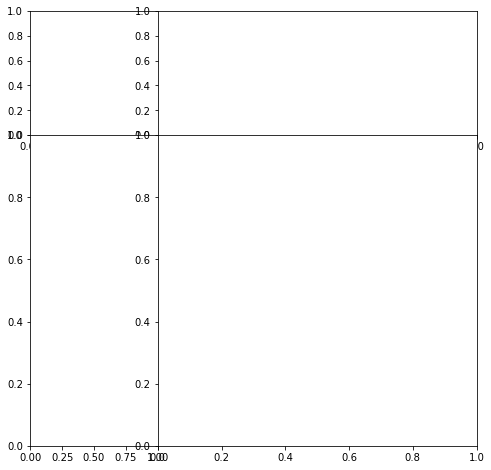

In [334]:
plot_cov_mat(sobj);

In [116]:
list(range(1, sobj.n_pred+1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

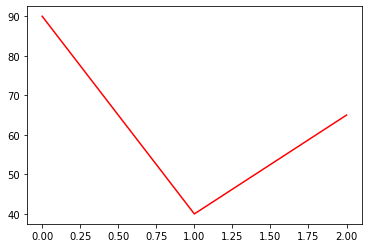

In [136]:
x = [0,1,2]
y = [90,40,65]
labels = ['high', 'low', 37337]
plt.plot(x,y, 'r')
plt.xticks(x, labels, rotation='vertical')
plt.show()